# Ejercicio 6
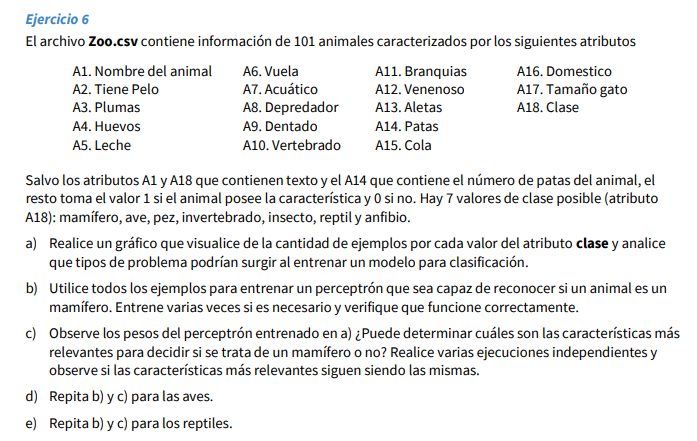

In [279]:
# configuración para notebook con instalación LOCAL
FUENTES_DIR  = '../Fuentes'     # carpeta donde se encuentran archivos .py auxiliares
DATOS_DIR    = '../Datos/'      # carpeta donde se encuentran los datasets
MODELOS_DIR  = '../Modelos/'    # carpeta donde se encuentran los modelos
ARCHIVOs_DIR = '../Archivos/'   # carpeta recuperar o copiar archivos

# agrega ruta de busqueda donde tenemos archivos .py
import sys
sys.path.append(FUENTES_DIR)

In [280]:
import pandas as pd      # para trabajar con archivos de datos csv, excel, etc: https://pandas.pydata.org/docs/getting_started/tutorials.html
import chardet           # para detectar la codificación de texto en archivos

nombre_archivo = DATOS_DIR + 'Zoo.csv' # archivo de zoo

#-- detectando la codificación de caracteres usada ----
with open(nombre_archivo, 'rb') as f:
    result = chardet.detect(f.read())  # or readline if the file is large

# recupera el archivo en un objeto dataframe de pandas utilizando la codificación detectada
df = pd.read_csv(nombre_archivo, encoding=result['encoding'])

# visualiza el dataframe
#print(df)
display(df)

,animal,Tiene_Pelo,Tiene_Plumas,Nace_de_huevo,Toma_Leche,Vuela,Acuatico,Depredador,Dentado,Vertebrado,Respira,Venenoso,Tiene_Aletas,Cant_Patas,Tiene_Cola,Domestico,Tamano_Gato,Clase
0,oso_hormiguero,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,Mamifero
1,antilope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,Mamifero
2,robalo,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,Pez
3,oso,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,Mamifero
4,jabali,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,Mamifero
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,canguro,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,Mamifero
97,avispa,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,Insecto
98,lobo,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,Mamifero
99,gusano,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,Invertebrado


<Axes: xlabel='Clase'>

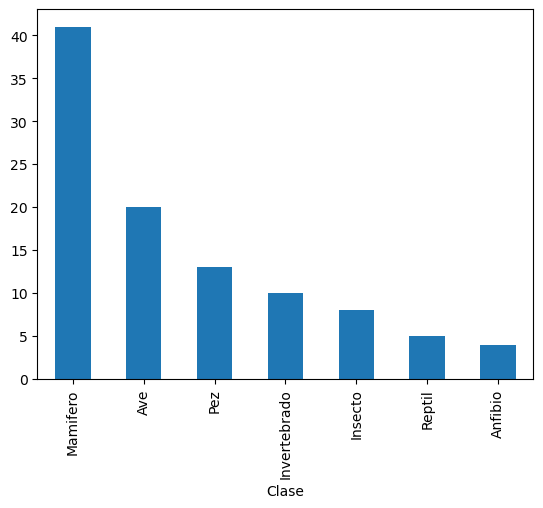

In [281]:
df["Clase"].value_counts().plot(kind="bar")

Podemos ver que hay muchos mas mamiferos que cualquier otra clase. Los algoritmos de aprendizaje automático tienden a optimizar para la clase mayoritaria, ya que tienen más ejemplos para aprender de ella. Esto lleva a que el modelo prediga mayormente la clase dominante, ignorando o clasificando incorrectamente la clase minoritaria.

In [282]:
#Entrenemos un perceptron para que vea si es mamifero o no

import numpy as np
from sklearn import model_selection,preprocessing

X = np.array(df.iloc[:,1:-1])
Y = np.array((df["Clase"] == "Reptil"))

X_train, X_test, y_train, y_test = model_selection.train_test_split(X,Y,test_size=0.30, random_state=42)

In [283]:
normalizador = preprocessing.StandardScaler()
X_train = normalizador.fit_transform(X_train)
X_test = normalizador.transform(X_test)

In [284]:
from ClassPerceptron import Perceptron

ppn = Perceptron(alpha=0.05, n_iter=200, random_state=None)
ppn.fit(X_train, y_train)

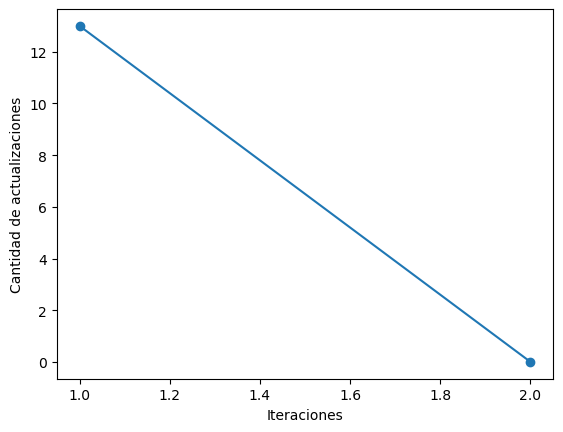

In [285]:
from matplotlib import pylab as plt

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Iteraciones')
plt.ylabel('Cantidad de actualizaciones')
plt.show()

In [286]:
Y_pred = ppn.predict(X_test)

aciertos = sum(Y_pred == y_test)
print("aciertos = ", aciertos)

print("%% de aciertos = %.2f %%" % (100*aciertos/X_test.shape[0]))

aciertos =  30
% de aciertos = 96.77 %


Veamos ahora los pesos del perceptron para ver cuales son las caracteristicas más relevantes para decidir si se trata de un mamifero o no.

In [287]:
imp = ""
for i,peso in enumerate(ppn.w_):
    print(f"{df.columns[i+1]} tiene peso {peso: .4f}")

    if (abs(peso) > 0.2):
        imp += " \n" + df.columns[i+1]
        
print(imp)
        

Tiene_Pelo tiene peso -0.4135
Tiene_Plumas tiene peso -0.0796
Nace_de_huevo tiene peso  0.1335
Toma_Leche tiene peso  0.3147
Vuela tiene peso -0.0068
Acuatico tiene peso -0.2496
Depredador tiene peso -0.0019
Dentado tiene peso  0.0751
Vertebrado tiene peso  0.1793
Respira tiene peso  0.1801
Venenoso tiene peso  0.0047
Tiene_Aletas tiene peso -0.0192
Cant_Patas tiene peso  0.0684
Tiene_Cola tiene peso  0.0673
Domestico tiene peso -0.1816
Tamano_Gato tiene peso -0.0980
 
Tiene_Pelo 
Toma_Leche 
Acuatico
